In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
%matplotlib inline
from datetime import timedelta


import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load data from 2019-01-26 to 2023-01-26
df = pd.read_csv('AAPL_returns.csv', index_col='Date', parse_dates=True)
df

,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,127.874939,-0.024719
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.455963,0.012364
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.098267,-0.033662
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.367035,0.034123
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.483627,0.008631
...,...,...,...,...,...,...,...
2021-03-26,121.480003,118.919998,120.349998,121.209999,94071200.0,119.951202,0.005142
2021-03-29,122.580002,120.730003,121.650002,121.389999,80819200.0,120.129311,0.001485
2021-03-30,120.400002,118.860001,120.110001,119.900002,85671900.0,118.654793,-0.012274


<AxesSubplot: xlabel='Date'>

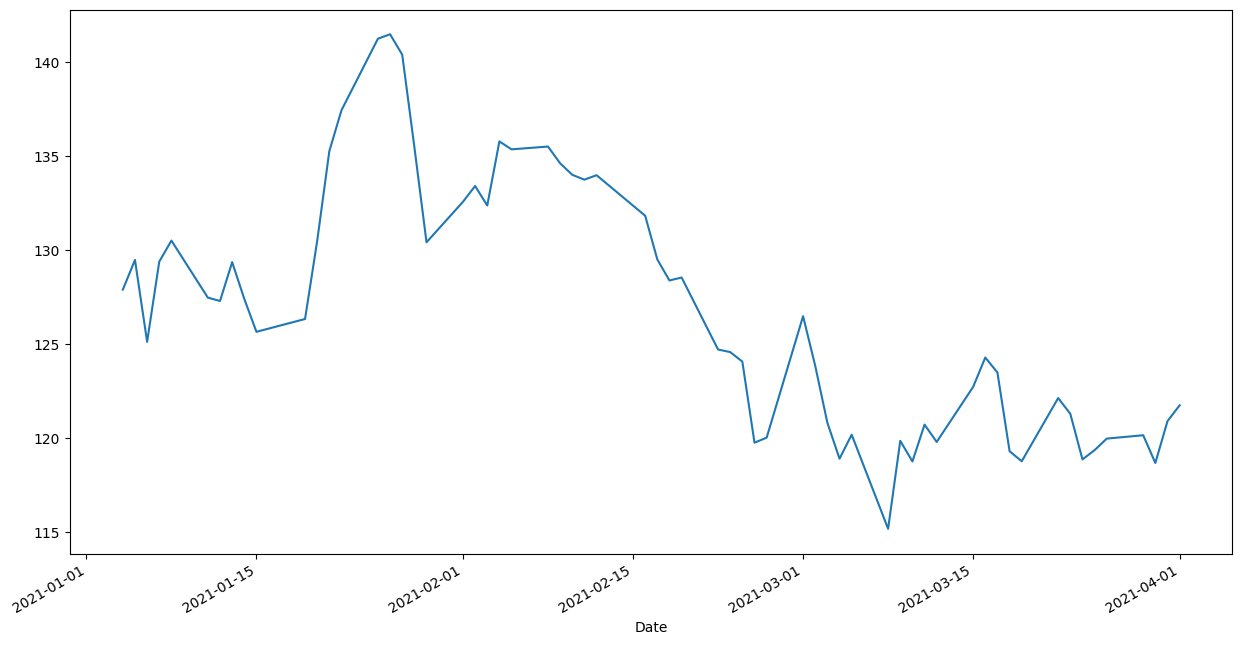

In [5]:
# Plot the data
df['Adj Close'].plot(figsize=(15,8))

In [32]:
# df_app = df['Adj Close'].copy().to_frame()


In [39]:
# df_= df_app[(df_app.index > '2022-01') & (df_app.index < '2022-04')]


In [6]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,returns
count,62.000000,62.000000,62.000000,62.000000,6.200000e+01,62.000000,62.000000
mean,129.977904,126.597742,128.532581,128.271613,1.096714e+08,126.866392,-0.000987
std,6.696031,6.500335,6.705765,6.738133,2.964228e+07,6.610091,0.020753
min,120.400002,116.209999,119.029999,116.360001,6.014510e+07,115.151558,-0.041673
25%,123.902502,120.587502,122.647497,121.984999,8.894782e+07,120.718130,-0.014778
50%,129.860001,126.810001,128.385002,127.810001,1.034714e+08,126.388264,-0.001658
75%,135.710003,132.324993,134.212505,133.752502,1.196941e+08,132.215115,0.011957
max,145.089996,141.369995,143.600006,143.160004,1.855495e+08,141.461838,0.053851


In [13]:
# Check for stationarity
timeseries = df[['returns']]
adftest = adfuller(timeseries) 
print('ADF Statistic: %f' % adftest[0])
print('p-value: %f' % adftest[1])
for key, value in adftest[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.139095
p-value: 0.000000
	1%: -3.542
	5%: -2.910
	10%: -2.593


<Figure size 2000x600 with 0 Axes>

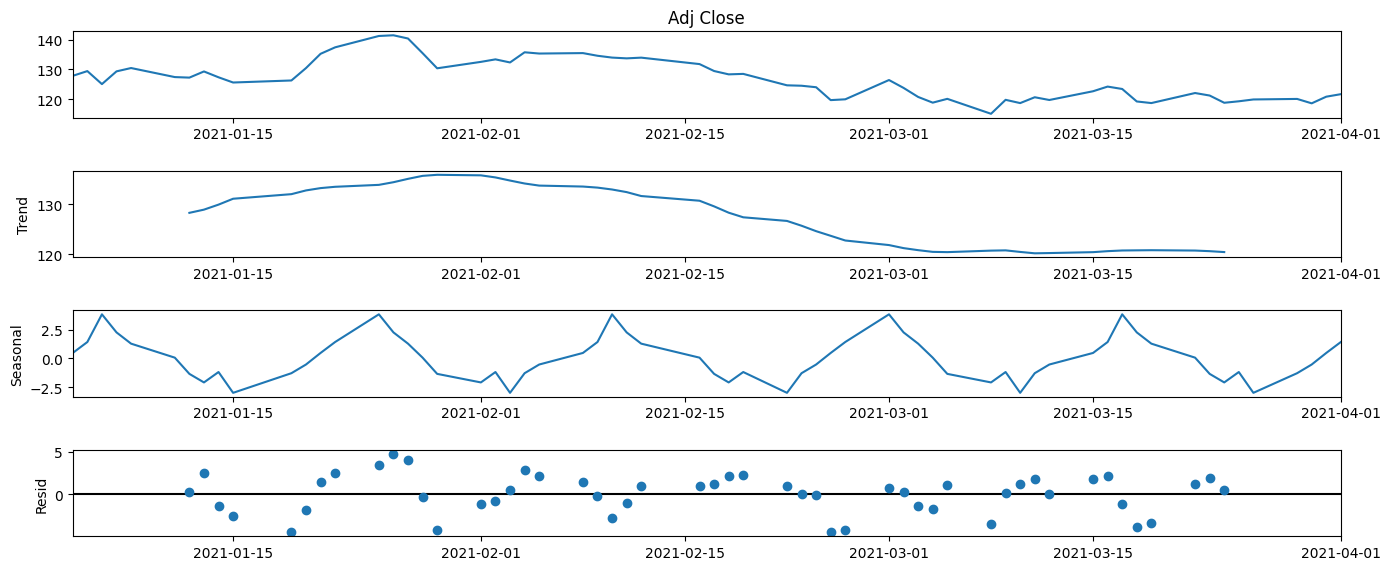

In [19]:
decomp_result = seasonal_decompose(df['Adj Close'], period=12)
plt.figure(figsize=(20,6))
decomp_result.plot().set_size_inches(16,6)
plt.show()

<AxesSubplot: xlabel='Date'>

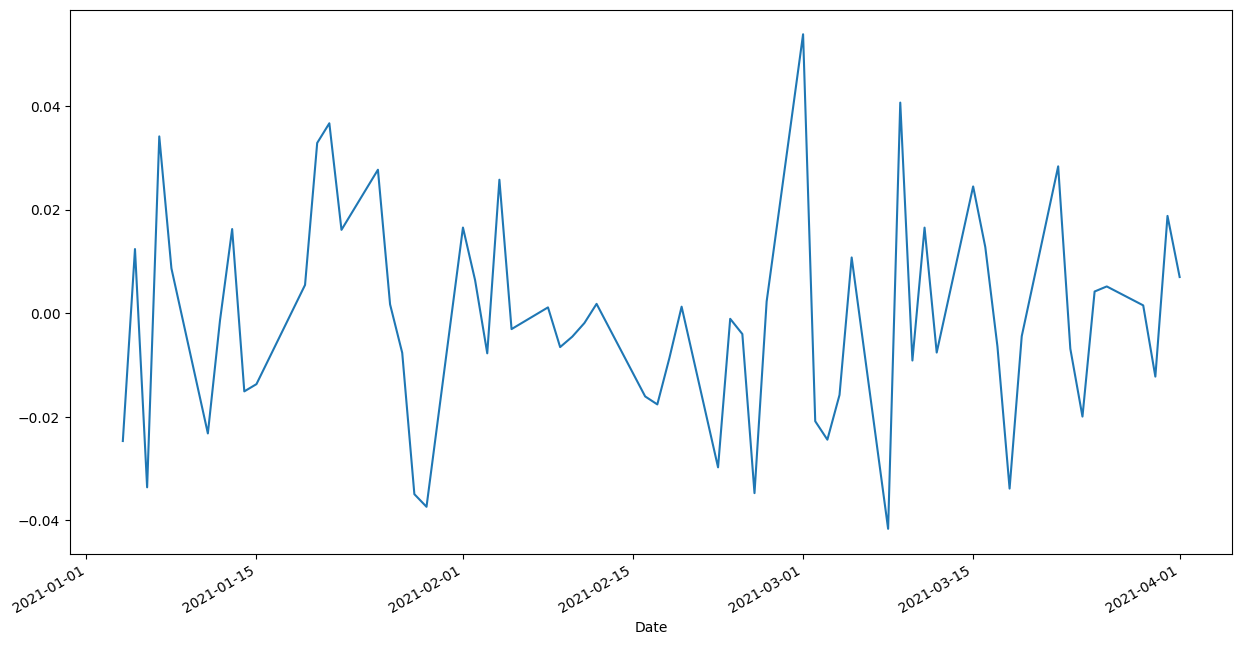

In [14]:
df['returns'].plot(figsize=(15,8))

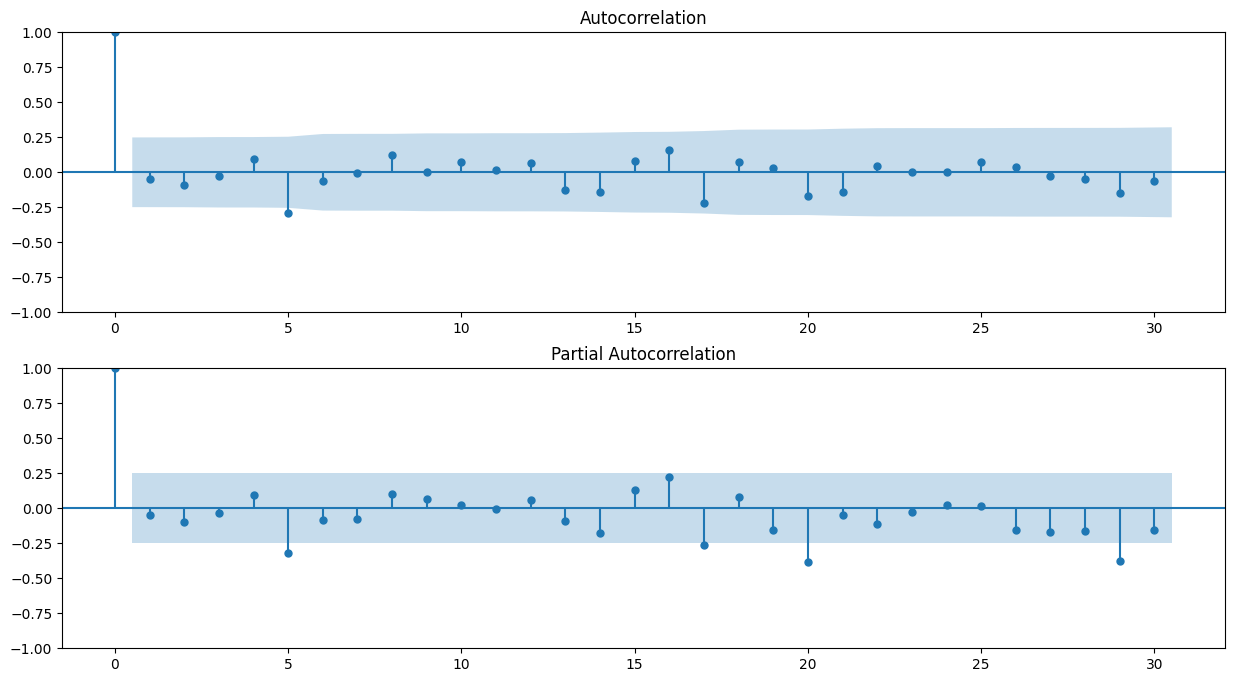

In [16]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,8))
plot_acf(df['returns'], lags=30, ax=ax1)
plot_pacf(df['returns'], lags=30, ax= ax2)
plt.show()


In [26]:
order_aic_bic=[]
for p in range(8):
    for q in range(8):
        try:
            m = ARIMA(df['returns'], order=(p, 0, q)).fit()
            order_aic_bic.append((p, q, m.aic, m.bic))
            # print("{}, {} AIC:{} BIC:{}".format(i, j, m.aic, m.bic))
        except:
            print(p, q, None, None)  

In [27]:
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

    p  q         AIC         BIC
0   0  0 -301.570377 -297.316109
9   1  1 -300.549779 -292.041242
1   0  1 -299.748223 -293.366820
8   1  0 -299.714861 -293.333458
40  5  0 -298.957923 -284.067982
.. .. ..         ...         ...
61  7  5 -286.140096 -256.360215
47  5  7 -285.291921 -255.512040
62  7  6 -283.883273 -251.976257
55  6  7 -283.653228 -251.746212
63  7  7 -282.110775 -248.076625

[64 rows x 4 columns]
    p  q         AIC         BIC
0   0  0 -301.570377 -297.316109
1   0  1 -299.748223 -293.366820
8   1  0 -299.714861 -293.333458
9   1  1 -300.549779 -292.041242
16  2  0 -298.257885 -289.749348
.. .. ..         ...         ...
61  7  5 -286.140096 -256.360215
47  5  7 -285.291921 -255.512040
62  7  6 -283.883273 -251.976257
55  6  7 -283.653228 -251.746212
63  7  7 -282.110775 -248.076625

[64 rows x 4 columns]


In [28]:
# ARIMA Modelmodel 
model = ARIMA(df['returns'], order=(0,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                   62
Model:                          ARIMA   Log Likelihood                 152.785
Date:                Thu, 26 Jan 2023   AIC                           -301.570
Time:                        20:54:11   BIC                           -297.316
Sample:                             0   HQIC                          -299.900
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.003     -0.373      0.709      -0.006       0.004
sigma2         0.0004   8.11e-05      5.226      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.70   Prob(JB):                         0.70
Heteroskedasticity (H):               0.74   Skew:                             0.25
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""